In [50]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import matplotlib.animation as anim
from tqdm import tqdm
from time import sleep


In [2]:
# 2.01

In [4]:
#1
numero=0
resp= np.zeros(21)
while numero<21:
  fact= np.math.factorial(numero)

  resp[numero]=fact
  numero+=1

print(np.longdouble(resp))

[1.00000000e+00 1.00000000e+00 2.00000000e+00 6.00000000e+00
 2.40000000e+01 1.20000000e+02 7.20000000e+02 5.04000000e+03
 4.03200000e+04 3.62880000e+05 3.62880000e+06 3.99168000e+07
 4.79001600e+08 6.22702080e+09 8.71782912e+10 1.30767437e+12
 2.09227899e+13 3.55687428e+14 6.40237371e+15 1.21645100e+17
 2.43290201e+18]


<IPython.core.display.Javascript object>


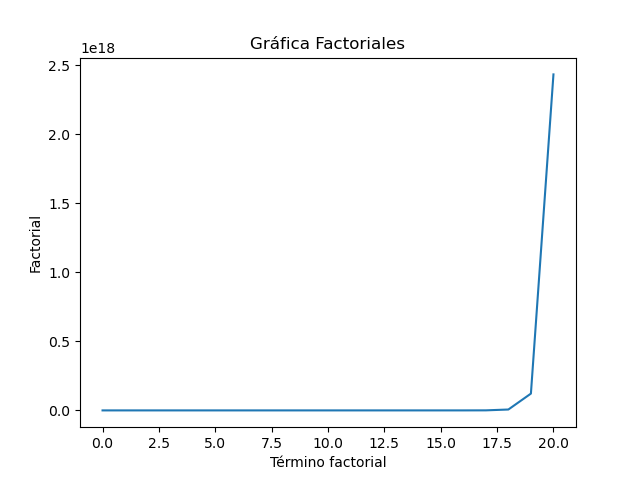

In [5]:
x=np.linspace(0,20,21)
plt.plot(x,resp)
plt.xlabel('Término factorial')
plt.ylabel('Factorial')
plt.title('Gráfica Factoriales')
plt.show()

In [6]:
#2.02
def cargar(nombre:str)->tuple:
    archivo=open(nombre,mode='r',encoding=("utf8"))
    llaves=archivo.readline().strip()
    linea=archivo.readline().strip()
    y=[]
    x=[]
    
    while len(linea)>0:
        datos=linea.split("  ")
        datos[0]
        x.append(float(datos[0]))
        y.append(float(datos[1]))
          
        linea=archivo.readline()
        
    archivo.close()

    return (x,y)


In [7]:
x,y=cargar('Maximos.txt')
maximos=[]
coord_x=[]
conteo=0
maximo=0
while conteo<(len(x)-1):
    en_y= y[conteo]
    
    if en_y>maximo:
        maximo=en_y
        if y[conteo-1]<y[conteo]and y[conteo]>y[conteo+1]:
            maximos.append(en_y)
            coord_x.append(x[conteo])
        
    if en_y<maximo and maximo!=0:
        maximo=0
           
        
    conteo+=1
print(coord_x, maximos)
    

[3.34767668182031, 3.3591918332968, 3.37070698477328, 3.38222213624977, 3.39373728772626, 3.40525243920275, 3.41676759067923, 3.42828274215572, 3.43979789363221, 3.4513130451087, 3.46666658041068, 3.50505041866564, 3.52424233779312, 3.5357574892696, 3.55111102457159, 3.56262617604807, 3.58949486282655, 3.62020193343051, 3.631717084907, 3.64323223638349, 3.67393930698745, 3.70464637759142, 3.7238382967189, 3.74686859967188, 3.77757567027584, 3.78909082175233, 3.80444435705431, 3.82363627618179, 3.85434334678576, 3.86969688208774, 3.88505041738973, 3.90040395269171, 3.92727263947018, 3.93494940712117, 3.95030294242316, 3.97333324537613, 3.99636354832911, 4.00787869980559, 4.01939385128208, 4.03858577040956, 4.06929284101353] [1.036267, 1.03554, 1.024369, 1.045406, 1.012803, 1.030349, 1.015571, 1.035833, 1.017348, 1.02287, 1.013802, 1.020233, 1.034254, 1.02666, 1.014296, 1.024395, 1.040716, 1.027063, 1.039316, 1.060527, 1.051431, 1.089617, 1.330906, 1.032746, 1.031765, 1.068328, 1.102898,

<IPython.core.display.Javascript object>


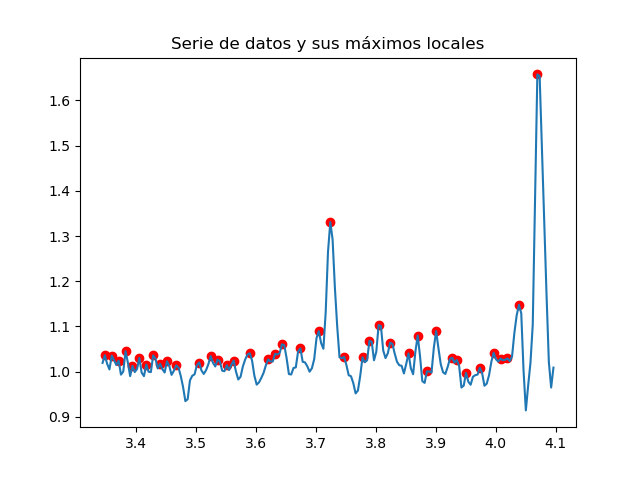

In [8]:
plt.plot(x,y)
plt.scatter(coord_x,maximos, color='r')
plt.title('Serie de datos y sus máximos locales')
plt.show()

In [9]:
#2.03
#1
fibonacci=np.zeros(21)

conteo=0

while conteo<21:

  if conteo<2:
    fibonacci[conteo]=int(conteo)

  if conteo>=2:
    fibonacci[conteo]=int(fibonacci[conteo-1])+int(fibonacci[conteo-2])

  conteo+=1

fibonacci

array([   0.,    1.,    1.,    2.,    3.,    5.,    8.,   13.,   21.,
         34.,   55.,   89.,  144.,  233.,  377.,  610.,  987., 1597.,
       2584., 4181., 6765.])

<IPython.core.display.Javascript object>


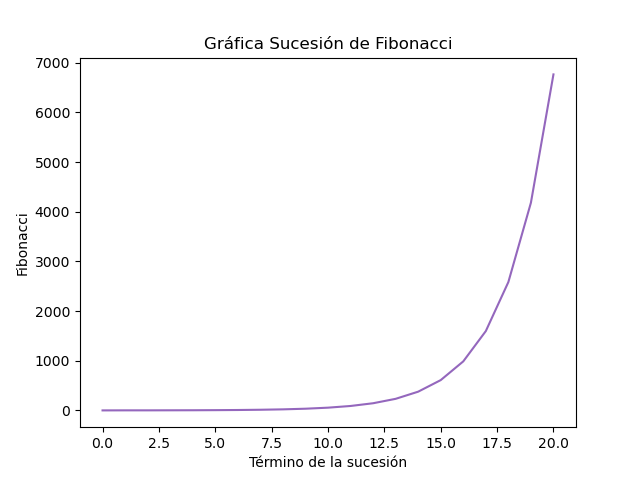

In [10]:
x=np.linspace(0,20,21)
plt.plot(x,fibonacci, color='tab:purple')
plt.xlabel('Término de la sucesión')
plt.ylabel('Fibonacci')
plt.title('Gráfica Sucesión de Fibonacci')
plt.show()


In [11]:
conteo=1
aureo_fib=np.zeros(20)
aureo= ((1+(5**(1/2)))/2)

while conteo<20:
  termino= (fibonacci[conteo+1])/(fibonacci[conteo])
  aureo_fib[conteo]=termino

  conteo+=1

print(aureo_fib)

[0.         1.         2.         1.5        1.66666667 1.6
 1.625      1.61538462 1.61904762 1.61764706 1.61818182 1.61797753
 1.61805556 1.61802575 1.61803714 1.61803279 1.61803445 1.61803381
 1.61803406 1.61803396]


<IPython.core.display.Javascript object>


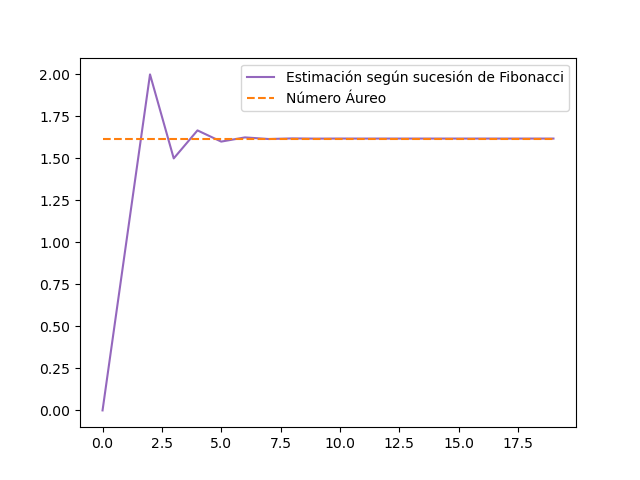

In [12]:
fig, ax = plt.subplots()
x=np.linspace(0,19,20)
aureos= np.full((20),aureo)
ax.plot(x,aureo_fib, label="Estimación según sucesión de Fibonacci", color='tab:purple')
ax.plot(x,aureos, label='Número Áureo', linestyle='dashed', color='tab:orange')
ax.legend(loc = 'upper right')

plt.show()

In [57]:
#2.08
class Particle:
    
    def __init__(self,r0,v0,a0,t,m=1,radius=0.3,Id=0):
        
        self.dt = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.radius = radius
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def SetVelocity(self,i):
        self.V[i] = self.v

    def GetVelocity(self,scale=1):
        return self.V[::scale]

    def CheckLimits(self,Limits):
        
        for i in range(2):
        
            if self.r[i] + self.radius > Limits[i][1] and self.v[i] > 0.:
                self.v[i] = -1.0*self.v[i]
            if self.r[i] - self.radius < Limits[i][0] and self.v[i] < 0.:
                self.v[i] = -1.0*self.v[i]

In [88]:
def RunSimulation1(t,Wall):
    
    r1 = np.array([-1.5,1.])
    v1 = np.array([10.,0.])
    a1 = np.array([0.,0.])
    
    r2 = np.array([0.,-1.5])
    v2 = np.array([12.,0.])
    a2 = np.array([0.,0.])
    
    p1 = Particle(r1,v1,a1,t)
    p2 = Particle(r2,v2,a2,t)
    
    Wall_ = Wall.copy()
    
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p1.Evolution(it)
        p1.CheckLimits(Wall_)
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps'):
        sleep(0.0001)
        p2.Evolution(it)
        p2.CheckLimits(Wall_)
    
    return p1, p2

In [89]:
Limits = np.array([[-5.,5.],[-5.,5.]])

In [90]:
dt = 0.05
tmax = 10
t = np.arange(0.,tmax,dt)
Particles_1,Particles_2 = RunSimulation1(t,Limits)

Running simulation: 100%|██████████| 200/200 [00:03<00:00, 64.60 Steps/s]


In [91]:
scale = 1
t = t[::scale]

<IPython.core.display.Javascript object>


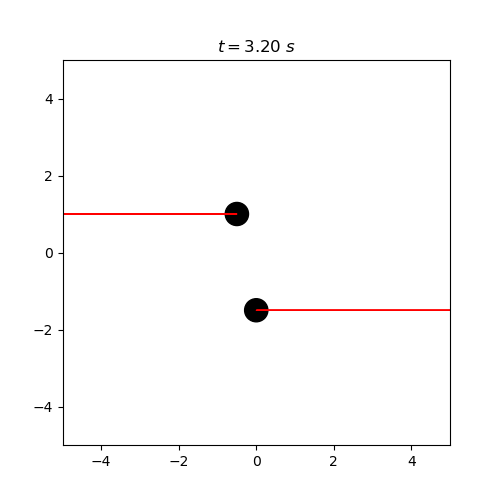

In [92]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])
    
def Update(i):
    
    ax.clear()
    init()
    ax.set_title(r'$ t=%.2f \ s$' %(t[i]))
    
    
    x_1 = Particles_1.GetPosition(scale)[i,0]
    y_1 = Particles_1.GetPosition(scale)[i,1]
    vx_1 = Particles_1.GetVelocity(scale)[i,0]
    vy_1 = Particles_1.GetVelocity(scale)[i,1]
    
    x_2 = Particles_2.GetPosition(scale)[i,0]
    y_2 = Particles_2.GetPosition(scale)[i,1]
    vx_2 = Particles_2.GetVelocity(scale)[i,0]
    vy_2 = Particles_2.GetVelocity(scale)[i,1]
    
    circle_1 = plt.Circle((x_1,y_1),Particles_1.radius, fill=True, color='k')
    circle_2 = plt.Circle((x_2,y_2),Particles_2.radius, fill=True, color='k')
    
    ax.add_patch(circle_1)
    ax.add_patch(circle_2)
    
    ax.arrow(x_1,y_1,vx_1,vy_1,color='r',head_width=0.2,length_includes_head=True)
    ax.arrow(x_2,y_2,vx_2,vy_2,color='r',head_width=0.2,length_includes_head=True)
    
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t),init_func=init)

In [1]:
#Capitulo 3

In [ ]:
#Derivación
#5

In [18]:
#6
#a
R=2
V=2
y=np.linspace(-4,4,26)
x=np.linspace(-4,4,26)

print(x,y)

[-4.   -3.68 -3.36 -3.04 -2.72 -2.4  -2.08 -1.76 -1.44 -1.12 -0.8  -0.48
 -0.16  0.16  0.48  0.8   1.12  1.44  1.76  2.08  2.4   2.72  3.04  3.36
  3.68  4.  ] [-4.   -3.68 -3.36 -3.04 -2.72 -2.4  -2.08 -1.76 -1.44 -1.12 -0.8  -0.48
 -0.16  0.16  0.48  0.8   1.12  1.44  1.76  2.08  2.4   2.72  3.04  3.36
  3.68  4.  ]


In [40]:
#b
def funcion_potencial(x,y):
    resp=( V*x*(1-((R**2)/((x**2)+(y**2)))))
        
    return(resp)


In [47]:
#c
h=0.001
def derivada_parcial_x(f,x,y):
    
    dx=(f((x+h),y)-f((x-h),y)/2*h)
    
    return dx

def derivada_parcial_y(f,x,y):
    
    dy=(f((x),(y+h))-f((x),(y-h))/2*h)
        
    return dy

vx=np.zeros((26,26))
vy=np.zeros((26,26))
for i in range(26):
    for j in range(26):
        vx[i,j]=derivada_parcial_x(funcion_potencial,x[i],y[j])
        vy[i,j]=-derivada_parcial_y(funcion_potencial,x[i],y[j])
        





<IPython.core.display.Javascript object>


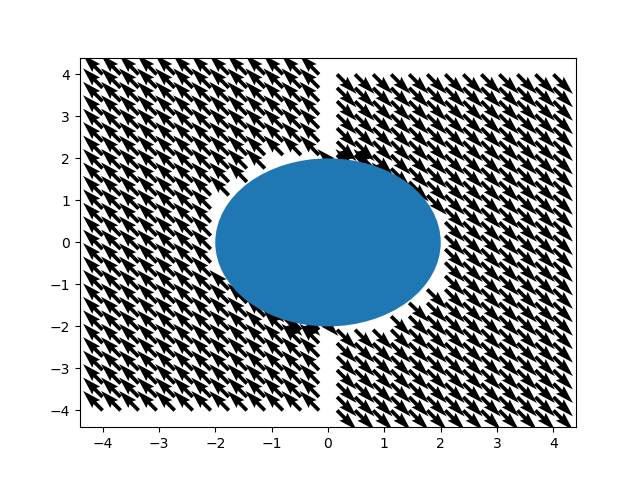

In [49]:
fig=plt.figure()
ax=fig.add_subplot(111)
for i in range(26):
    for j in range(26):
        if x[i]**2 + y[j]**2>=2**2:  
            ax.quiver(x[i],y[j],vx[i,j],vy[i,j])
            
            
circle=plt.Circle((0,0),2)
ax.add_patch(circle)

In [44]:
#Raíces de Polinomios
#3
indices= np.array([3,5,-1,0])
raiz=np.roots(indices)

print(indices,raiz)

[ 3  5 -1  0] [-1.84712709  0.18046042  0.        ]


In [ ]:
-1.84712709  0.18046042  0.   